<a href="https://colab.research.google.com/github/Georgia-MAX-holic/theory/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%ED%95%98%EC%9D%B4%ED%8D%BCopt%2C%EB%B2%A0%EC%9D%B4%EC%A7%80%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 하이퍼 파라미터 튜닝 수행 방법

- Grid Search 

- Random Search

- Bayesian Optimization

- 수동 튜닝 




---

### 하이퍼 파라미터 튜닝의 주요 이슈 

- Gradient Boosting 기반 알고리즘은 튜닝 해야 할 하이퍼 파라미터 개수가 많고 범위가 넓어서 가능한 개별 경우의 수가 너무 많음 

- 이러한 경우의 수가 많을 경우 데이터가 크면 하이퍼 파라미터 튜닝에 굉장히 오랜 시간이 튜입되어야 함 




GridSearchCV(classifier,params,cv=3)

RandomizedSearch(Classifier, params, cv=3 , n_iter=10)

    params = {
      'max_depth'= [10 , 20 , 30 , 40 ,50 ],
      'num_leaves'= [35, 45, 55, 65 ],
      'colsample_bytree'=[0.5, 0.6 , 0.7 , 0.8 , 0.9 , 1.0],
      'subsample' = [0.5, 0.6 , 0.7, 0.8 , 0.9 , 1.0],
      'max_bin' = [100, 200, 300, 400],
      'min_child_weight'= [10, 20, 30 ,40]
      }

- GridSearchCV 는 수행 시간이 너무 오래 걸림, 개별 하이퍼 파라미터들을 Grid 형태로 지덩하는 것은 한계가 존재 }(데이터 세트가 작을때 유리 

- RandomizedSearch는 수행 시간은 줄여 주지만, Random한 선택으로최적 하이퍼 파라미터 검출에 태생적 제약(데이터 세트가 클 때 유리) 

- 두가지 방법 모두 Iteration 중에 어느정도 최적화된 하이퍼 파라미터들을 활용하면서 최적화를 수행할 수 없음 






---
# Bayesian 최적화가 필요한 순간 

- 가능한 최소의 시도로 최적의 답을 찾아야 할 경우 

- 개별  시도가 너무 많은 시간/자원이 필요할 때 




---
### 베이지안 최적화 개요 

- 베이지안 최적화는 미지의 함수가 반환하는 값의 최소 또는 최대값을 만드는 최적해를 짧은 반복을 통해 찾아내는 최적화 방식 

- 베이지안 최적화는 새로운 데이터를 입력 받았을 대 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수를 도출 

- 대체 모델(Surrogate Model)과 획득 함수로 구성되며, 대체 모델은 획득 함수로 부터 최적 입력값을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선 

- 획득 함수는 개선된 대체 모델을 기반으로 다시 최적 입력 값을 계산 








---

### 베이지안 최적화 수행 단계 

- Step 1 : 최초에는 랜덤하게 하이퍼 파라미터들을 샘플링 하여 성능 결과를 관측 

- Setp 2 : 관측된 값을 기반으로 대체 모델은 최적 함수를 예측 추정 

- Step 3 : 획득 함수에서 다음으로 관측할 하이퍼 파라미터 추출 

- Step 4 : 해당 하이퍼 파라미터로 관측된 값을 기반으로 대체 모델은 다시 최적 함수 예측 추정 



---
### 베이지안 최적화 구현 요소 

1. 입력 값 범위 

Search_space = {"x": (-10, 10), 'y':(-15, 15)}

2. 함수 

def black_box_fuction(x,y):
  return -x **2-20*y




---

### 베이지안 최적화를 구현한 주요 패키지 

- HyperOpt 

- Bayesian optimization

- Optuna 



---
### HyperOpt 주요 구성 요소 

- search space
  - 여러개의 변수들과 이들 값의 범위를 지정 

  - hp.quniform(label, low, high, q) : label로 지정된 입력 값 변수 검색 공간을 최소값 low에서 최대값 high까지 q의 간격을 가지고 설정 

  - hp.uniform(label, low ,high): 최소값 low에서 최대값 high 까지 정규 분포 형태의 검색 공간 설정 

  - hp.randint(label,upper): 0부터 최대값 upper까지 random한 정수 값으로 검색 공간 설정 

  - hp.loguniform(label, low, hight):exp(uniform(low,high)값을 반환하며, 반환 값의 log 변환 된 정규 분포 형태를 가지는 검색 공간 설정 

- 목적 함수 : Search space를 입력 받아 로직에 따라 loss값을 계산하고 이를 반환하는 함수 
반드시 dictionary형태의 값을 반환하고 여기에 "loss":loss값이 기재되어야 함 

- 목적 함수의 최소값을 찾는 함수 
  - 목적 함수를 실행하여 최소 반환값(loss)를 최적으로 찾아 내는 함수 

  - bayesian 최적화 기법으로 입력 변수들의 search space상에서 정해진 횟수만큼 입력 변수들을 입력하여 목적 함수의 반환값(loss)을 최적으로 찾아냄 

  - hyperopt는 이를 위해 fmin() 함수를 제공.

  - fmin() 함수의 인자로 목적함수, search space, 베이지안 최적화 기법 유형, 최적화 시도 횟수, 최적화 로그 기록 객체를 인자로 넣어줌 , best = fmin(objective, space=hp.uniform("x",hp.uniform("x",-10,10), algo=tpe.suggest, max_evals=100, trials)



In [18]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
## hp 모듈을 사용하여 입력 변수명 및 검색 공간 설정
from hyperopt import hp

search_space = {'x':hp.quniform('x', -10, 10, 1), ## dictionary 형태
                'y':hp.quniform('y', -15, 15, 1)}

In [20]:
from hyperopt import STATUS_OK

## 목적 함수 생성
## 변수, 검색 공간을 입력으로 받고, 특정 값을 반환하는 구조
def objective_func(search_space):
  
  x = search_space['x']
  y = search_space['y']
  retval = x ** 2 - 20 * y

  return retval

- 목적 함수의 반환 값이 최소가 될 수 있는 최적의 입력 값을 베이지안 최적화 기법에 기반하여 찾아야 함 

- HyperOpt는 이러한 이러한 기능을 fmin() 함수를 통해 제공함 

In [21]:
from hyperopt import fmin, tpe, Trials
import numpy as np

## 입력 결과를 저장할 객체 생성
trial_val = Trials()

## 목적 함수의 최솟값을 반환하는 최적 입력 변수를 5번 시도로 찾아냄
## fmin() 함수는 아래의 주요 인자를 가짐
best_01 = fmin(fn=objective_func,    ## 목적 함수
               space=search_space,   ## 검색 공간
               algo=tpe.suggest,     ## 베이지안 최적화 적용 알고리즘
               max_evals=20,         ## 입력 시도 횟수
               trials=trial_val,     ## 시도한 입력 값 및 입력 결과 저장
               #rstate=np.random.default_rng(seed=0)   ## fmin()을 시도할 때마다 동일한 결과를 가질 수 있도록 설정하는 랜덤 시드
               )

100%|██████████| 20/20 [00:00<00:00, 517.95it/s, best loss: -239.0]


In [22]:
print('best:', best_01)

best: {'x': 1.0, 'y': 12.0}


In [23]:
trial_val.results
trial_val.vals

{'x': [0.0,
  -3.0,
  -3.0,
  -3.0,
  1.0,
  -8.0,
  -2.0,
  6.0,
  5.0,
  5.0,
  -2.0,
  -2.0,
  6.0,
  8.0,
  7.0,
  10.0,
  7.0,
  -7.0,
  5.0,
  6.0],
 'y': [4.0,
  2.0,
  -9.0,
  11.0,
  12.0,
  5.0,
  9.0,
  -1.0,
  7.0,
  3.0,
  6.0,
  -7.0,
  -1.0,
  8.0,
  -13.0,
  -14.0,
  14.0,
  -5.0,
  -4.0,
  -6.0]}

In [24]:
import pandas as pd 


losses = [loss_dict['loss'] for loss_dict in trial_val.results]

result_df = pd.DataFrame(
    {
        'x':trial_val.vals['x'],
        'y':trial_val.vals['y'],
        'losses':losses
     }
)

result_df.head(5)

,x,y,losses
0,0.0,4.0,-80.0
1,-3.0,2.0,-31.0
2,-3.0,-9.0,189.0
3,-3.0,11.0,-211.0
4,1.0,12.0,-239.0


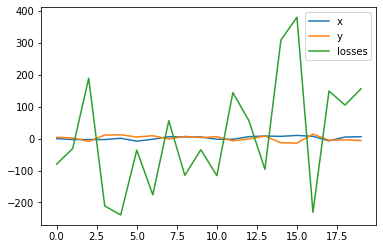

In [25]:
result_df.plot()

In [26]:
## 유방암 데이터셋 로드
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

In [27]:
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
## 학습 및 검증 데이터셋으로 데이터 분리
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

- 모델 성능 평가 함수 선언 

## 모델 성능 평가 함수 선언


In [32]:
## 모델 성능 평가 함수 선언
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


  HyperOpt 설정 1 - 검색 공간 설정
        하이퍼 파라미터의 검색 공간을 설정함


In [31]:
from hyperopt import hp

xgb_search_space = {
    'max_depth':hp.quniform('max_depth', 5, 20, 1),                     ## 정수형 하이퍼 파라미터 => quniform 사용
    'min_child_weight':hp.quniform('min_child_weight', 1, 2, 1),        ## 정수형 하이퍼 파라미터 => quniform 사용
    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 1),
}

HyperOpt 설정 2 - 목적 함수 설정

  검색 공간에서 설정한 하이퍼 파라미터들을 입력 받아서 XGBoost를 학습시키고, 평가 지표를 반환하도록 구성되어야 함


In [33]:
from sklearn.model_selection import cross_val_score  ## 교차 검증
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):

  xgb_clf = XGBClassifier(
      n_estimators=100,
      max_depth=int(search_space['max_depth']),                ## int형으로 형변환 필요
      min_child_weight=int(search_space['min_child_weight']),  ## int형으로 형변환 필요
      learning_rate=search_space['learning_rate'], 
      colsample_bytree=search_space['colsample_bytree'],
      eval_metric='logloss'
  )

  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)  ## 3개의 교차 검증 세트로 정확도 반환

  ## acc는 cv=3 개수만큼의 결과를 리스트로 가짐, 이를 평균하여 반환하되, -1을 곱함
  return {
      'loss':(-1) * np.mean(accuracy),
      'status':STATUS_OK
  }

HyperOpt 설정 3 - fmin()을 사용하여 최적 하이퍼 파라미터 찾기

In [34]:
## 3. fmin()을 사용하여 최적 하이퍼 파라미터 찾기

from hyperopt import fmin, tpe, Trials

trial_val = Trials() ## 결과 저장

best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,    ## 최대 반복 횟수 지정
    trials=trial_val,
)

100%|██████████| 50/50 [00:09<00:00,  5.15it/s, best loss: -0.9670326478447775]


In [35]:
best

{'colsample_bytree': 0.6044744960000747,
 'learning_rate': 0.19148272338829603,
 'max_depth': 17.0,
 'min_child_weight': 2.0}

In [36]:
xgb_wrapper = XGBClassifier(
    n_estimators=400,
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    colsample_bytree=round(best['colsample_bytree'], 5)
)

In [37]:
## early stopping

evals = [(X_tr, y_tr), (X_val, y_val)]

## model train

xgb_wrapper.fit(
    X_tr, y_tr,
    early_stopping_rounds=50,
    eval_metric='logloss',
    eval_set=evals,
    verbose=True
)

[0]	validation_0-logloss:0.544895	validation_1-logloss:0.607149
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 50 rounds.
[1]	validation_0-logloss:0.442255	validation_1-logloss:0.546299
[2]	validation_0-logloss:0.361735	validation_1-logloss:0.480376
[3]	validation_0-logloss:0.300979	validation_1-logloss:0.440366
[4]	validation_0-logloss:0.25289	validation_1-logloss:0.406305
[5]	validation_0-logloss:0.214857	validation_1-logloss:0.388899
[6]	validation_0-logloss:0.183892	validation_1-logloss:0.361394
[7]	validation_0-logloss:0.158976	validation_1-logloss:0.338211
[8]	validation_0-logloss:0.139979	validation_1-logloss:0.320955
[9]	validation_0-logloss:0.123496	validation_1-logloss:0.307496
[10]	validation_0-logloss:0.108507	validation_1-logloss:0.294289
[11]	validation_0-logloss:0.096509	validation_1-logloss:0.283469
[12]	validation_0-logloss:0.086733	validation_1-logloss:0.276703
[

XGBClassifier(colsample_bytree=0.60447, learning_rate=0.19148, max_depth=17,
              min_child_weight=2, n_estimators=400)

In [38]:
preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9947
